# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Văn Lê Bá Thành
- Student ID: 22127390
- Class: 22CLC08

## Required Libraries

In [315]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

## Function Definitions

In [316]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    raw_image = Image.open(img_path)
    return raw_image

def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img.save(img_path)


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def perform_brightness(img):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Input brightness
    brightness = float(input('Enter brightness [-255:255]: '))

    # Perform brightness adjustment
    result = np.clip(img + brightness, 0, 255)

    return result

def perform_Contrast (img):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    
    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''

    contrast = input('Enter contrast [-255:255]: ')

    # Check and replace contrast if exceed [-255:255]
    contrast = np.clip(float(contrast), -255, 255)

    # Calculate factor between dark and bright color
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    
    # Perform contrast adjustment
    result = (np.clip(factor * (img - 128) + 128, 0, 255))

    return result

def perform_flip(img, direction):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    
    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # loop to perform all flip direction
    if direction == 0:
        return np.flipud(img)
    elif direction == 1:
        return np.fliplr(img)

def perform_grayscale (img):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    weight = np.array([0.299, 0.587, 0.114])
    result = np.matmul(img, weight)
    stacked_greyscale_img = np.stack((result,)*3, axis=-1)
    return stacked_greyscale_img

def perform_sephia (img):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    weight = np.array([[0.393, 0.769, 0.189], 
                       [0.349, 0.686, 0.168], 
                       [0.272, 0.534, 0.131]])
    
    # Apply the sepia filter
    result = np.matmul(img, weight.T)
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

def get_kernel (type):
    '''
    Return the kernel based on input type

    Parameters
    ----------
    type : string
        input type for kernel selection

    Returns
    -------
    result : numpy.ndarry
        Kernel of corresponding type
    '''
    if (type == 'blur'): 
        kernel_size = 20
        sigma = (kernel_size-1)/6
        kernel_1d = np.linspace(-(kernel_size // 2), kernel_size // 2, num=kernel_size)
        kernel_1d = np.array(1 / (np.sqrt(2 * np.pi) * sigma) * (np.exp(-np.power(kernel_1d / sigma, 2) / 2)))
        kernel_2d = np.outer(kernel_1d.T, kernel_1d.T)
        kernel_2d *= 1.0 / np.sum(kernel_2d)
        return kernel_2d 
    else:
        sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        return sharp


    # GAUSSIAN_KERNEL_3X3 = np.array([[1,2,1], [2,4,2], [1,2,1]]).astype(np.float32)/16
    # GAUSSIAN_KERNEL_5X5 = np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]).astype(np.float32)/256
    # SHARPEN_KERNEL = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    # if type == "blur3x3":
    #     return GAUSSIAN_KERNEL_3X3
    # elif type == "blur5x5":
    #     return GAUSSIAN_KERNEL_5X5
    # elif type == "sharp":
    #     return SHARPEN_KERNEL
    
def apply_filter(img, type):
    '''
    Apply a filter (blur or sharpen) to an image using convolution.

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    type : str
        Type of filter to apply ('blur' or 'sharpen')

    Returns
    -------
    result : numpy.ndarray
        Filtered (2D) image
    '''
    # Get the kernel
    kernel = get_kernel(type)
    # Get image height, width
    image_height, image_width, channels = img.shape[:3]
    kernel_height, kernel_width = kernel.shape[:2]
    padding = kernel_height // 2
    # Tạo một ma trận mới có kích thước bằng với ma trận ảnh gốc để lưu kết quả
    result = np.zeros((image_height, image_width, 3))
    # Tạo ma trận 0 đủ để chứa padding lẫn điểm ảnh gốc
    padded_img = np.zeros((image_height+2*padding, image_width+2*padding, 3))
    # Sao chép ảnh vào vị trí trung tâm của ma trận b
    padded_img[padding:padding+image_height, padding:padding+image_width,:] = img



    # Create a shape for the sliding windows
    shape = (image_height, image_width, kernel_height, kernel_width, channels)
    strides = (padded_img.strides[0], padded_img.strides[1], padded_img.strides[0], padded_img.strides[1], padded_img.strides[2])
    sliding_windows = np.lib.stride_tricks.as_strided(padded_img, shape=shape, strides=strides)

    # Perform convolution using np.einsum
    result = np.einsum('ijklc,kl->ijc', sliding_windows, kernel)
    print(result.shape)

    if type == 'sharpen':
        result = np.clip(result, 0, 255)

    return result

def crop_img(img):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    size = img.shape[0]
    startPoint = size//4 - 1
    result = img[startPoint: 3*size//4 - 1, startPoint: 3*size//4 - 1]
    return result

def apply_circle(img):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    size = img.shape[0]
    center_index = radius = size//2
    matrix_index_j = np.tile(np.arange(size), reps=(size, 1))
    matrix_index_i = matrix_index_j.copy().T
    # Tạo mảng Mask (boolean) để đánh dấu các điểm ảnh nằm bên ngoài đường tròn
    masks = ((matrix_index_i-center_index)**2 +
             (matrix_index_j-center_index)**2) > (radius**2)
    # Gán màu các điểm ảnh nằm bên ngoài đường tròn bằng màu đen
    img[masks] = [0, 0, 0]
    return img

# Cắt ảnh theo hình ellipse nghiêng góc alpha chiều kim đồng hồ
def ellise_alpha_degrees(a_pow_2: int, b_pow_2: int, center_index: int, alpha: float, matrix_i: np.ndarray, matrix_j: np.ndarray) -> np.ndarray:
    """Xác định các điểm ảnh nằm ngoài Elip nghiêng góc alpha theo chiều kim đồng hồ và tiếp xúc với 4 cạnh của bức ảnh

    Args:
        center_index (int): tọa độ tâm Elip
        matrix_i (np.array): ma trận lưu trữ các giá trị tọa độ dòng của tất cả điểm ảnh
        matrix_j (np.array): ma trận lưu trữ các giá trị tọa độ cột của tất cả điểm ảnh

    Returns:
        np.array: ma trận boolean (masks) đánh dấu các điểm ảnh nằm ngoài Elip
    """
    # Công thức của ellipse xoay góc alpha chiều kim đồng hồ quanh trục tọa độ
    ellipse = (((matrix_i-center_index)*np.cos(alpha)-(matrix_j-center_index)*np.sin(alpha))**2) / a_pow_2 + (((matrix_i-center_index)*np.sin(alpha) + (matrix_j-center_index)*np.cos(alpha))**2)/b_pow_2
    # Tạo mảng Mask (boolean) để đánh dấu các điểm ảnh nằm bên ngoài đường ellipse
    masks = ellipse > 1
    return masks

def ellipse_image(img: Image) -> Image:
    """Cắt ảnh theo khung hai Elip nghiêng nằm chồng lên nhau

    Args:
        img (Image): Ảnh gốc

    Returns:
        Image: Ảnh kết quả
    """
    # Lấy kích thước ảnh
    img_arr = np.array(img)
    size = img_arr.shape[0]

    # Tìm tọa độ tâm Elip
    center_index = size//2
    # Tìm kích thước 2 trục của elip, trục lớn là 2a và trục nhỏ là 2b (a>b)
    # a^2 + b^2 = (cạnh^2)/2. Để cân xứng thì chọn a^2 = 3/4 * (cạnh^2)/2
    a_pow_2 = 0.75*(size**2)/2.0
    b_pow_2 = 0.25*(size**2)/2.0
    # Khởi tạo các ma trận chỉ chứa index i và ma trận chỉ chứa index j của các điểm ảnh
    matrix_index_j = np.tile(np.arange(size), reps=(size, 1))
    matrix_index_i = matrix_index_j.copy().T
    # Tìm các điểm ảnh nằm ngoài ellipse
    masks1 = ellise_alpha_degrees(
        a_pow_2, b_pow_2, center_index, 3*np.pi/4, matrix_index_i, matrix_index_j)
    masks2 = ellise_alpha_degrees(
        a_pow_2, b_pow_2, center_index, np.pi/4, matrix_index_i, matrix_index_j)
    # Kết hợp lại, các điểm ảnh nằm ngoài cả 2 ellipse sẽ được đánh dấu True
    # Còn nằm trong cả 2 ellipse hoặc 1 trong 2 thì sẽ đánh dấu False
    masks = np.logical_and(masks1, masks2)  # sử dụng toán tử logic AND
    # Gán màu các điểm ảnh nằm bên ngoài 2 đường ellipse bằng màu đen
    img_arr[masks] = [0, 0, 0]
    return img_arr

def zoom_out(image):
    # Take every second row and column
    zoomed_out_image = image[::2, ::2]
    return zoomed_out_image

def zoom_in(image):
    # Repeat each row and each column twice
    zoomed_in_image = np.repeat(np.repeat(image, 2, axis=0), 2, axis=1)
    return zoomed_in_image


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [317]:
# YOUR CODE HERE
from time import time
import os

def show_result_img(src_img, result_img, run_time, choose_algorithm)->None:
    """Hiển thị ảnh kết quả và lưu dưới định dạng png

    Args:
        input_file (str): tên file ảnh gốc
        src_img (Image): Ảnh gốc
        result_img (Image): Ảnh kết quả
        func (str): tên chức năng sử dụng lên ảnh gốc
    """
    # show ảnh ra màn hình
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"Running time: {run_time} seconds")
    ax[0].set_title("Origin image")
    ax[0].imshow(src_img)
    if (choose_algorithm == 1):
        ax[1].set_title("Bright image")
    elif (choose_algorithm == 2):
        ax[1].set_title("Contrast image")
    elif (choose_algorithm == 3):
        ax[1].set_title("Flip image")
    elif (choose_algorithm == 4):
        ax[1].set_title("Gray image")
    elif (choose_algorithm == 5):
        ax[1].set_title("Sephia image")
    elif (choose_algorithm == 6):
        ax[1].set_title("Blur image")
    elif (choose_algorithm == 7):
        ax[1].set_title("Sharpen image")
    elif (choose_algorithm == 8):
        ax[1].set_title("Crop image")
    elif (choose_algorithm == 9):
        ax[1].set_title("Circle\ellip image")
    elif (choose_algorithm == 2):
        ax[1].set_title("Zoom in\ Zoom out image")
    ax[1].imshow(result_img)

def test ():
    #img_path = input("Enter image path: ")
    img_path = 'test.png'

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img).astype(np.float32)
    # Show original Image
    show_img(raw_img)
    #choose_algorithm = int(input("Choose an image processing feature\n0. Perform all\n1. Adjust brightness \n2. Adjust contrast\n3. Flip vertically and horizontally\n4. Convert RGB to grayscale\n5. Convert RGB to sephia\n6. Apply gaussian blur\n7. Apply sharpen\n 8. Crop central\n9. Crop circle and elip\n10. Zoom in and zoom out\nYour choice: "))
    choose_algorithm = 2
    if (choose_algorithm == 0 or choose_algorithm == 1):
        start = time()
        result = perform_brightness(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_brightness' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 2):
        start = time()
        result = perform_Contrast(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_contrast' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 3):
        for direction in range(2):
            start = time()
            result = perform_flip(pic, direction)
            end = time()
            result_img = Image.fromarray(np.uint8(result))
            result_path = img_name + '_' + str(direction) + format
            show_result_img(raw_img, result_img, end - start, choose_algorithm)
            save_img(result_img, result_path)

    if (choose_algorithm == 0 or choose_algorithm == 4):
        start = time()
        result = perform_grayscale(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_gray' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 5):
        start = time()
        result = perform_sephia(pic)    
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_sephia' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 6):
        start = time()
        result = apply_filter(pic, 'blur')
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_blur' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 7):
        start = time()
        result = apply_filter(pic, 'sharp')
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_sharp' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 8):
        start = time()
        result = crop_img(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_crop' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 9):
        start = time()
        result = (pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_circle' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)

        start = time()
        result = ellipse_image(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_elip' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)
    if (choose_algorithm == 0 or choose_algorithm == 10):
        start = time()
        result = zoom_out(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_zoomOut' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)

        start = time()
        result = zoom_in(pic)
        end = time()

        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_zoomIn' + format
        show_result_img(raw_img, result_img, end - start, choose_algorithm)
        save_img(result_img, result_path)


## Main FUNCTION

In [318]:
def main():
    print("Enter image path: ")
    img_path = input()

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img).astype(np.float32)
    # Show original Image
    show_img(raw_img)

    # Perform brightness adjustment
    #perform_brightness(pic, img_name, format)

    # Perform sephia adjustment
    #perform_sephia(raw_img, img_name, format)    
    #perform_flip(pic, result_path, img_name, format)
    perform_grayscale(pic, img_name, format)
    #perform_blend(pic, result_path, img_name, format)
    #apply_filter(pic, 'blur5x5', img_name, format)

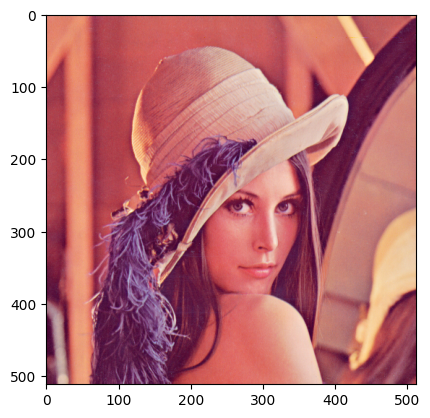

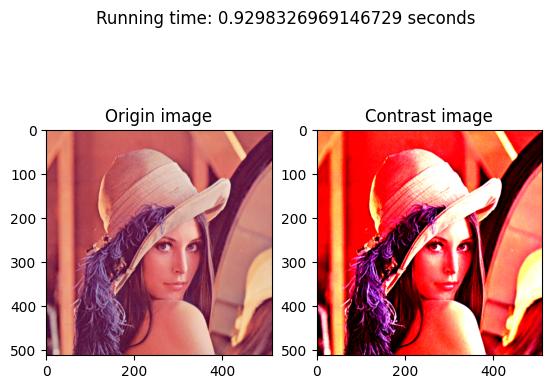

In [319]:
# Call main function
test()